In [1]:
import os
import pickle

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from metrics.visualization import visualization

import torch
import sys

sys.path.append('../')

from models.timegan import TimeGAN
from models.utils import rescale
from data.data_preprocess import data_preprocess

%matplotlib inline

## PCA and t-SNE visualization

In [2]:
path = "/home/rzhou/Projects/timegan-pytorch/output/rounD_09-23_seq250_numfea2_Epoch5000"
with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)
    # ori_data = ori_data.reshape(ori_data.shape[0]*ori_data.shape[1], ori_data.shape[2])
ori_data.shape

(3619, 250, 2)

In [5]:
# min_G_loss的pt生成的new_data
with open(f"{path}/fake_data.pickle", "rb") as fb:
    new_data = pickle.load(fb)
    # new_data = new_data.reshape(new_data.shape[0]*new_data.shape[1], new_data.shape[2])

In [6]:
with open(f"{path}/args.pickle", "rb") as fb:
    args = torch.load(fb)
with open(f"{path}/fake_time.pickle", "rb") as fb:
    fake_time = pickle.load(fb)

fake_time = torch.tensor(fake_time, dtype=torch.float32)

data_path="/DATA1/rzhou/ika/single_testcases/rounD/rounD_single_09-23_min_seq250.csv"


epoch=4000#要改
model = TimeGAN(args)
model_path = "/home/rzhou/Projects/timegan-pytorch/output/rounD_09-23_seq250_numfea2_Epoch5000/min_G_loss_model_epoch_4000.pt"
model.load_state_dict(torch.load(model_path))
model.to(args.device)
model.eval()
with torch.no_grad():
    # Generate fake data
    Z = torch.rand((len(fake_time), args.max_seq_len, args.Z_dim))
    new_data = model(X=None, T=fake_time, Z=Z, obj="inference").numpy()
new_data.shape

(3619, 250, 2)

In [7]:

has_values_greater_than_one = np.any(ori_data > 0.99)

has_values_greater_than_one

False

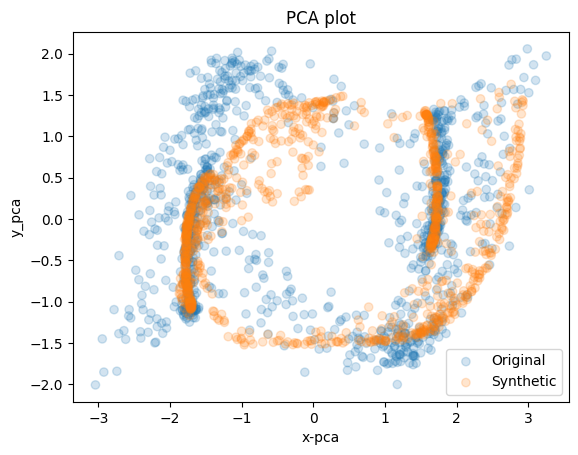

In [8]:
visualization(ori_data, new_data, 'pca')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.193s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.159353
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.035122
[t-SNE] KL divergence after 300 iterations: 0.995007


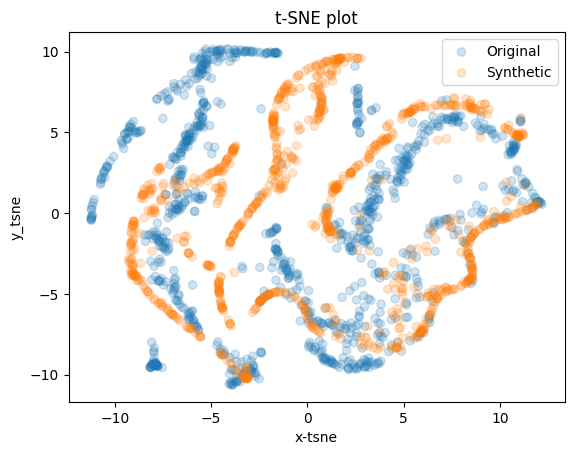

In [9]:
visualization(ori_data, new_data, 'tsne')